In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
from IPython.display import clear_output

tqdm.pandas()
pd.options.display.max_colwidth = -1
pd.options.display.max_columns = 15

In [3]:
from dsutils.eda import *
from dsutils.stats import *

In [4]:
data = pd.read_csv('train_reduced.csv')

In [5]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0


___
<center><b>abs_word_diff</b>: absolute difference between number of words in question1 and question2</center>


         min  1st  25th  50th  75th  99th  max  mean   std
0        0    0.0  1.0   3.0   6.0   24.0  223  4.44  5.59
1        0    0.0  1.0   2.0   3.0   13.0  39   2.42  2.69
overall  0    0.0  1.0   2.0   5.0   21.0  223  3.69  4.83


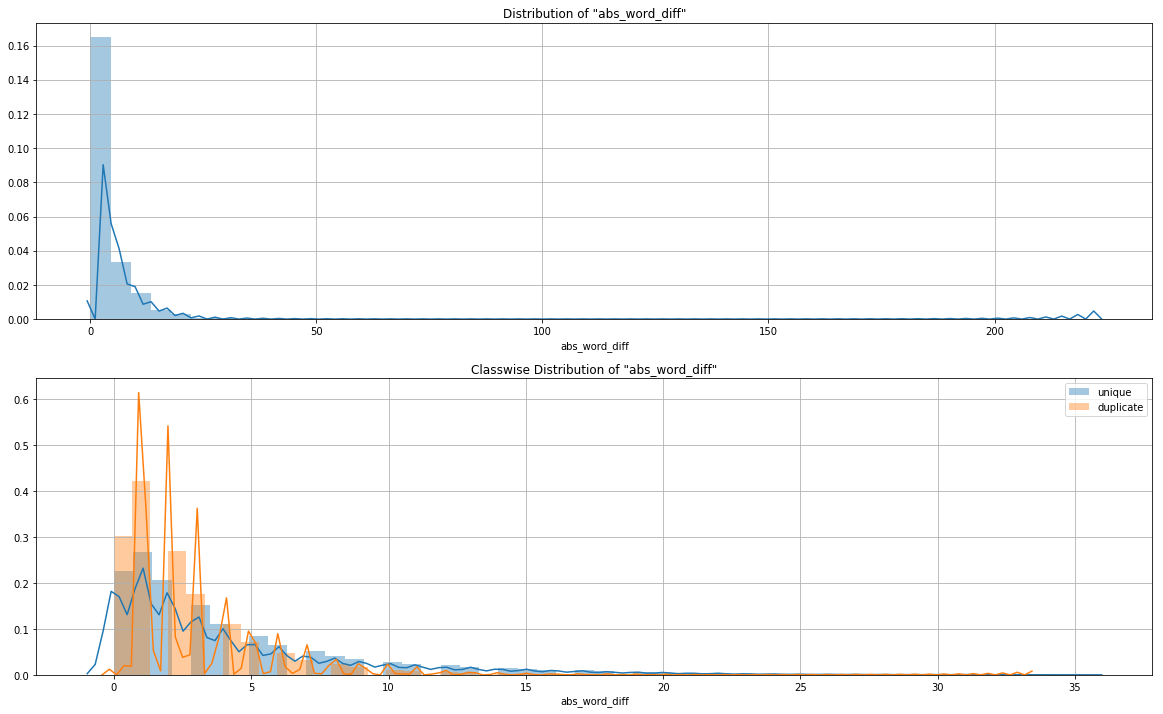

In [6]:
data['abs_word_diff'] = data[['question1', 'question2']].progress_apply(
    lambda row: abs(len(row['question1'].split())-len(row['question2'].split())),
    axis=1
)

print(feature_distribution(data, 'abs_word_diff', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'abs_word_diff', 'is_duplicate', labels=['unique', 'duplicate'], uthreshold=35)

___
<center><b>avg_text_len</b>: average number of words present in the questions</center>


         min  1st  25th  50th  75th  99th    max   mean   std
0        2.5  4.0  8.0   10.5  14.0  30.5  135.0  11.77  5.54
1        2.5  4.0  7.5   9.0   11.5  22.5  62.0   9.85   3.75
overall  2.5  4.0  8.0   10.0  13.0  28.0  135.0  11.06  5.04


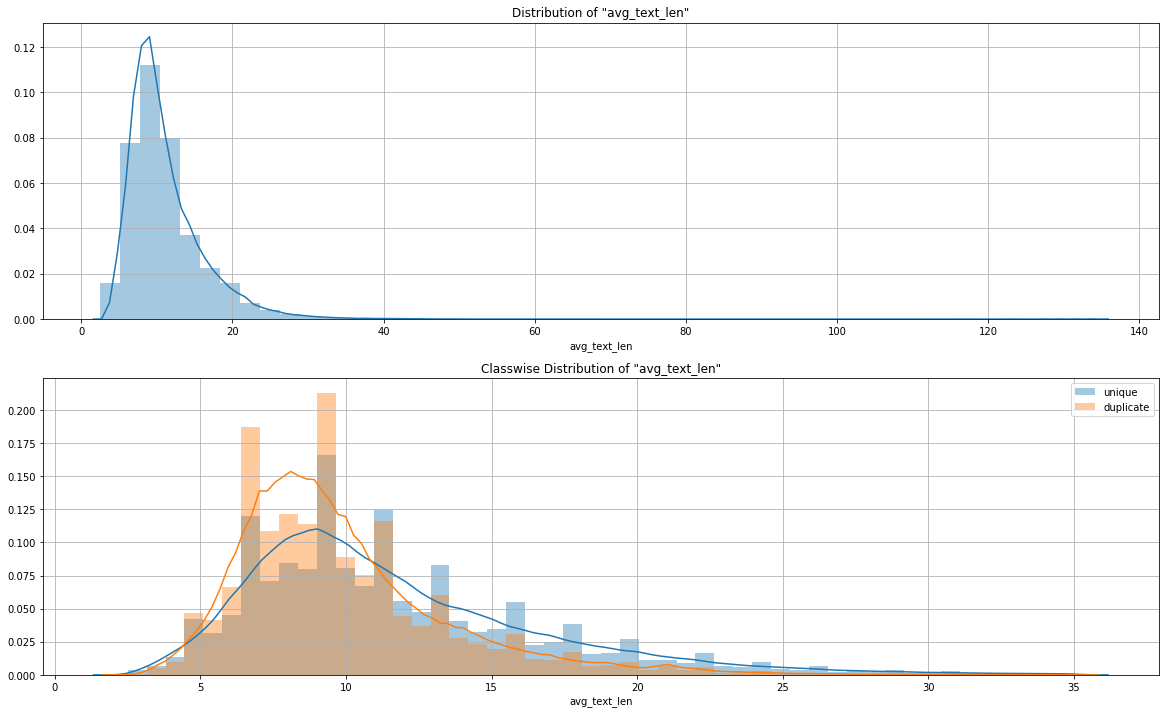

In [7]:
data['avg_text_len'] = data[['question1', 'question2']].progress_apply(
    lambda row: (len(row['question1'].split())+len(row['question2'].split()))/2,
    axis=1
)

print(feature_distribution(data, 'avg_text_len', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'avg_text_len', 'is_duplicate', labels=['unique', 'duplicate'], uthreshold=35)

___
<center><b>rel_word_diff</b>: abs_word_diff / avg_text_len </center>


         min  1st  25th  50th  75th  99th   max  mean   std
0        0.0  0.0  0.11  0.27  0.51  1.25  1.79  0.34  0.31
1        0.0  0.0  0.09  0.18  0.35  0.92  1.52  0.24  0.22
overall  0.0  0.0  0.11  0.22  0.44  1.18  2.00  0.30  0.28


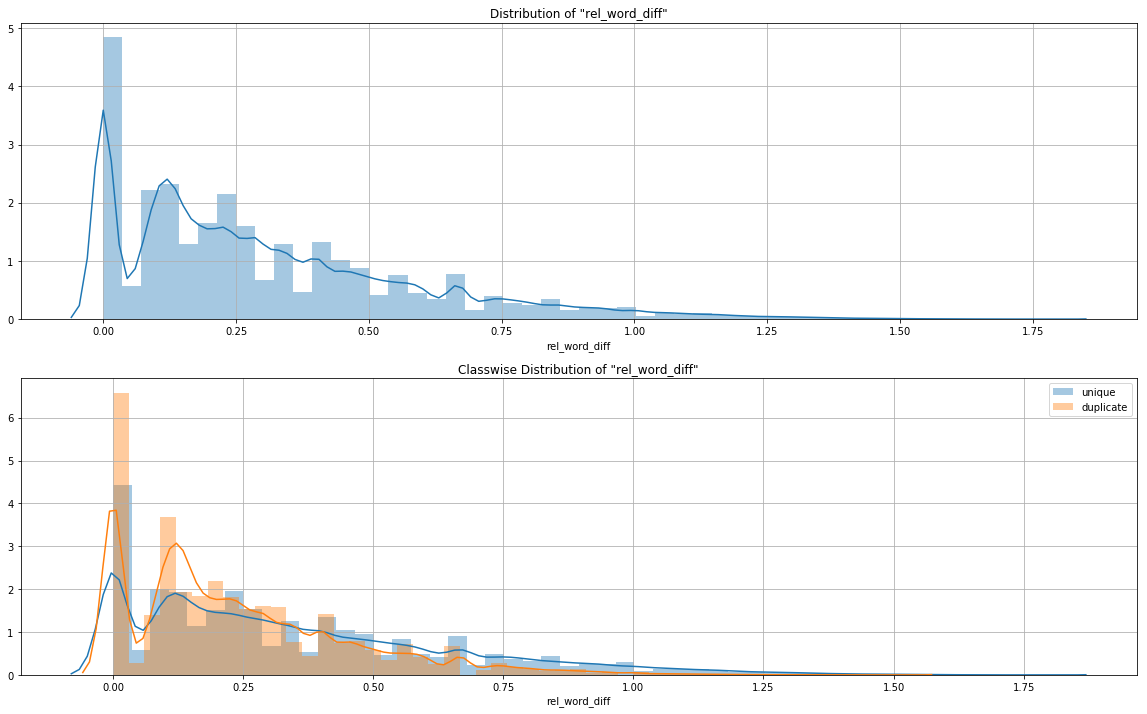

In [8]:
data['rel_word_diff'] = data[['abs_word_diff', 'avg_text_len']].progress_apply(
    lambda row: row['abs_word_diff']/row['avg_text_len'],
    axis=1
)

print(feature_distribution(data, 'rel_word_diff', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'rel_word_diff', 'is_duplicate', labels=['unique', 'duplicate'])

___
<center><b>word_intersection</b>:  number of unique words common to question1 and question2</center>


         min  1st  25th  50th  75th  99th  max  mean   std
0        0    0.0  2.0   3.0   5.0   16.0  36   3.76  3.22
1        0    1.0  3.0   5.0   6.0   15.0  42   5.22  2.73
overall  0    0.0  2.0   4.0   6.0   16.0  42   4.30  3.12


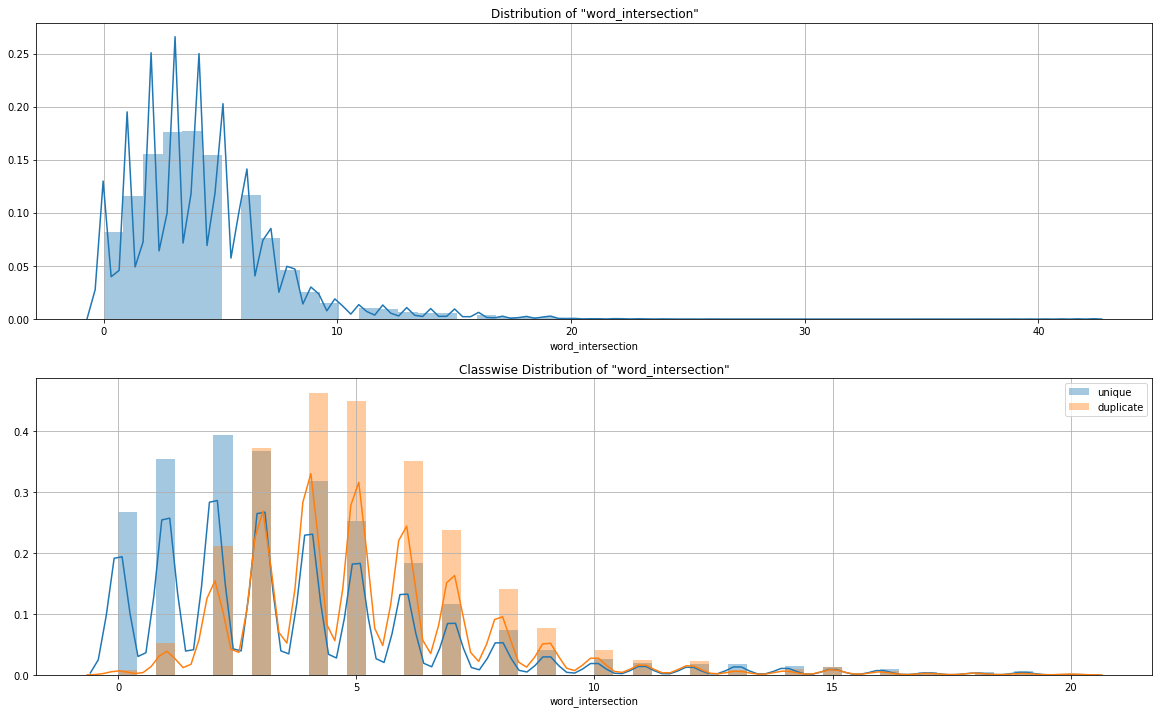

In [9]:
data['word_intersection'] = data[['question1', 'question2']].progress_apply(
    lambda row: len(set(row['question1'].split())&set(row['question2'].split())),
    axis=1
)

print(feature_distribution(data, 'word_intersection', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'word_intersection', 'is_duplicate', labels=['unique', 'duplicate'], uthreshold=20)

___
<center><b>word_union</b>: number of unique words in question1 and question2 combined</center>


         min  1st  25th  50th  75th  99th  max   mean   std
0        3    6.0  12.0  17.0  23.0  47.0  162  18.64  8.91
1        3    6.0  10.0  13.0  16.0  31.0  84   13.89  5.27
overall  3    6.0  11.0  15.0  20.0  44.0  162  16.89  8.10


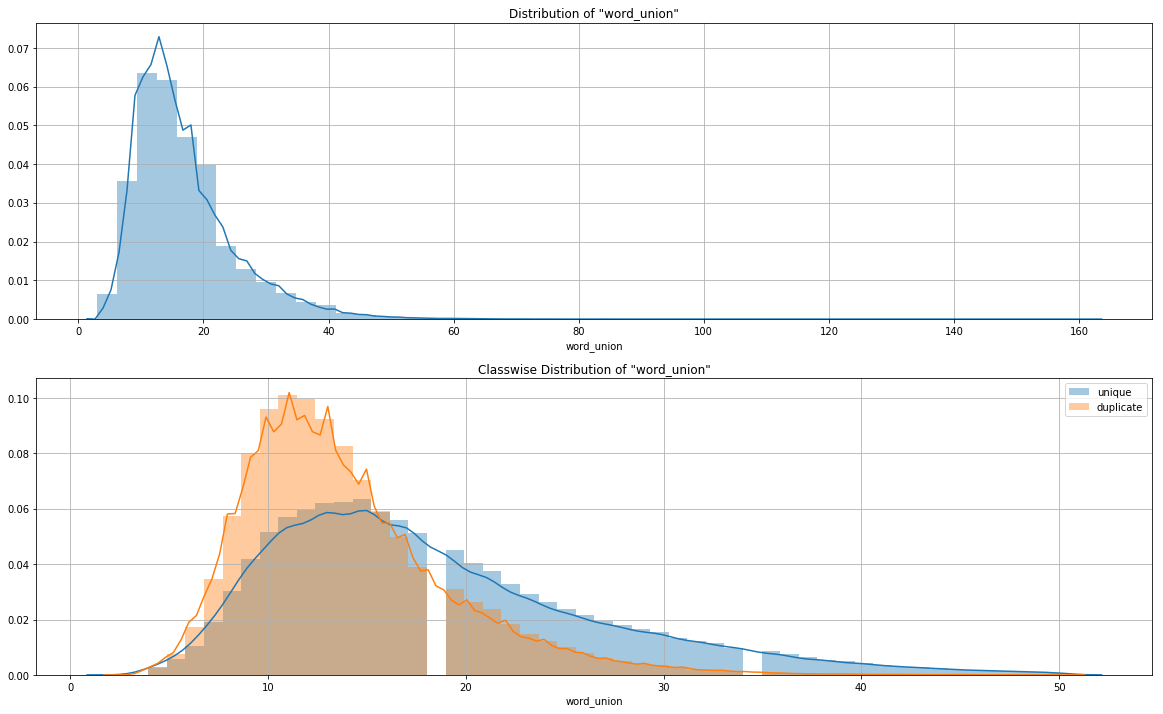

In [10]:
data['word_union'] = data[['question1', 'question2']].progress_apply(
    lambda row: len(set(row['question1'].split())|set(row['question2'].split())),
    axis=1
)

print(feature_distribution(data, 'word_union', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'word_union', 'is_duplicate', labels=['unique', 'duplicate'], uthreshold=50)

___
<center><b>jaccard_similarity</b>: |Q1 &cap; Q2| / |Q1 &cup; Q2| </center>


         min   1st  25th  50th  75th  99th  max  mean   std
0        0.0  0.00  0.08  0.17  0.36  0.88  1.0  0.25  0.23
1        0.0  0.08  0.25  0.37  0.54  0.90  1.0  0.41  0.20
overall  0.0  0.00  0.12  0.25  0.44  0.89  1.0  0.31  0.23


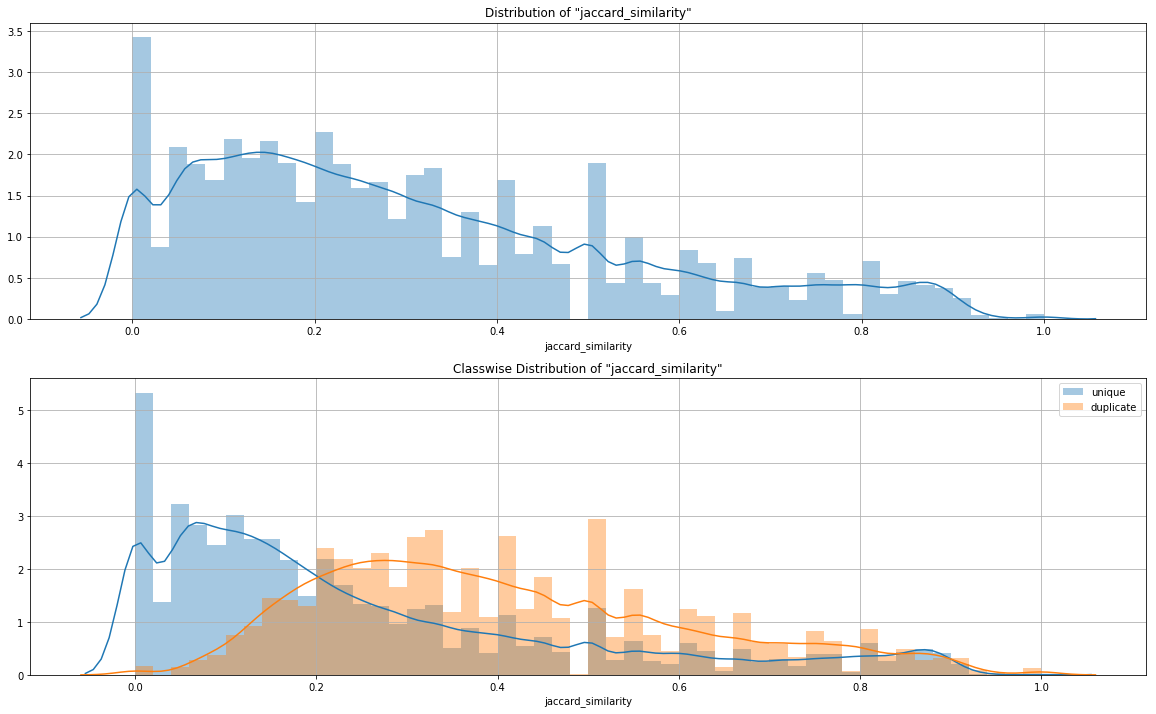

In [11]:
data['jaccard_similarity'] = data[['word_intersection', 'word_union']].progress_apply(
    lambda row: row['word_intersection']/row['word_union'],
    axis=1
)

print(feature_distribution(data, 'jaccard_similarity', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'jaccard_similarity', 'is_duplicate', labels=['unique', 'duplicate'])

In [12]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,abs_word_diff,avg_text_len,rel_word_diff,word_intersection,word_union,jaccard_similarity
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,2,13.0,0.153846,10,13,0.769231
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,5,10.5,0.476190,4,16,0.250000
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,4,12.0,0.333333,3,21,0.142857
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,2,10.0,0.200000,0,19,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,6,10.0,0.600000,2,18,0.111111


In [13]:
feats = ['abs_word_diff', 'avg_text_len', 'rel_word_diff', 'word_intersection', 'word_union', 'jaccard_similarity']
pbc = []
for feat in feats:
    pbc.append(point_biserial_correlation('is_duplicate', feat, data))

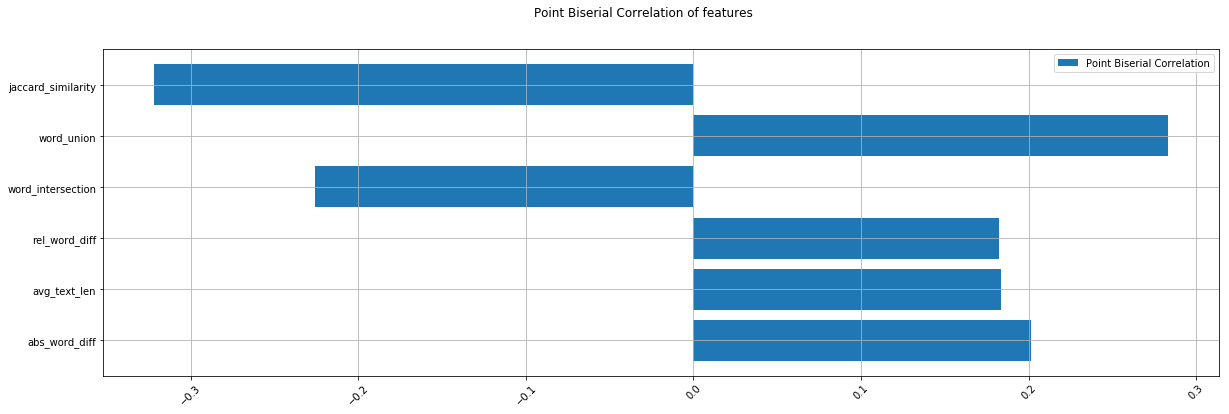

In [14]:
fig, ax = plt.subplots(figsize=(20, 6))
fig.suptitle('Point Biserial Correlation of features')
plt.barh(y=feats, width=pbc)
ax.grid()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.legend(['Point Biserial Correlation'])

# Model Fitting

In [15]:
from sklearn.metrics import log_loss, f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression, SGDClassifier

In [16]:
kf = KFold(n_splits=10, shuffle=True, random_state=101)

In [17]:
def train_model(model, data, feats, target, **kwargs):
    model_performance = {
        'log loss': [],
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1 score': []
    }

    for train_indices, test_indices in kf.split(data):
        X_train = data[feats].iloc[train_indices]
        y_train = data[target].iloc[train_indices]

        X_test = data[feats].iloc[test_indices]
        y_test = data[target].iloc[test_indices]

        model.fit(X_train, y_train)
        y_pred_ = model.predict_proba(X_test)
        y_pred = model.predict(X_test)
        model_performance['log loss'].append(log_loss(y_test, y_pred_))
        model_performance['accuracy'].append(accuracy_score(y_test, y_pred))
        model_performance['precision'].append(precision_score(y_test, y_pred))
        model_performance['recall'].append(recall_score(y_test, y_pred))
        model_performance['f1 score'].append(f1_score(y_test, y_pred))

    
    fig = plt.figure(figsize=(20, 6))

    ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=1)

    ax1.plot(model_performance['log loss'], label='log loss per iteration')
    ax1.plot(np.ones(10)*np.mean(model_performance['log loss']), '--', label='mean log loss')
    
    ax1.plot(model_performance['accuracy'], label='accuracy per iteration')
    ax1.plot(np.ones(10)*np.mean(model_performance['accuracy']), '--', label='mean accuracy')
    
    if 'plot_precision' in kwargs.keys() and kwargs['plot_precision'] == True:
        ax1.plot(model_performance['precision'], label='precision per iteration')
        ax1.plot(np.ones(10)*np.mean(model_performance['precision']), '--', label='mean precision')    
    
    if 'plot_recall' in kwargs.keys() and kwargs['plot_recall'] == True:
        ax1.plot(model_performance['recall'], label='recall per iteration')
        ax1.plot(np.ones(10)*np.mean(model_performance['recall']), '--', label='mean recall')    

    if 'plot_f1' in kwargs.keys() and kwargs['plot_f1'] == True:
        ax1.plot(model_performance['f1 score'], label='f1 score per iteration')
        ax1.plot(np.ones(10)*np.mean(model_performance['f1 score']), '--', label='mean f1 score')    
    
    ax1.grid()
    ax1.legend()
    ax1.set_xlabel('fold')
    ax1.set_ylabel('value')
    ax1.set_title('Model Performance')

    ax2 = plt.subplot2grid((1, 3), (0, 1), colspan=2)

    ax2.bar(x=feats+['intercept'], height=np.append(model.coef_[0], model.intercept_[0]))
    ax2.grid()
    for tick in ax2.get_xticklabels():
        tick.set_rotation(45)
    ax2.set_title('Model Coefficients')
    
    return model_performance, model

Mean Loss 0.5807281997401692 +- 0.0013182225426155265


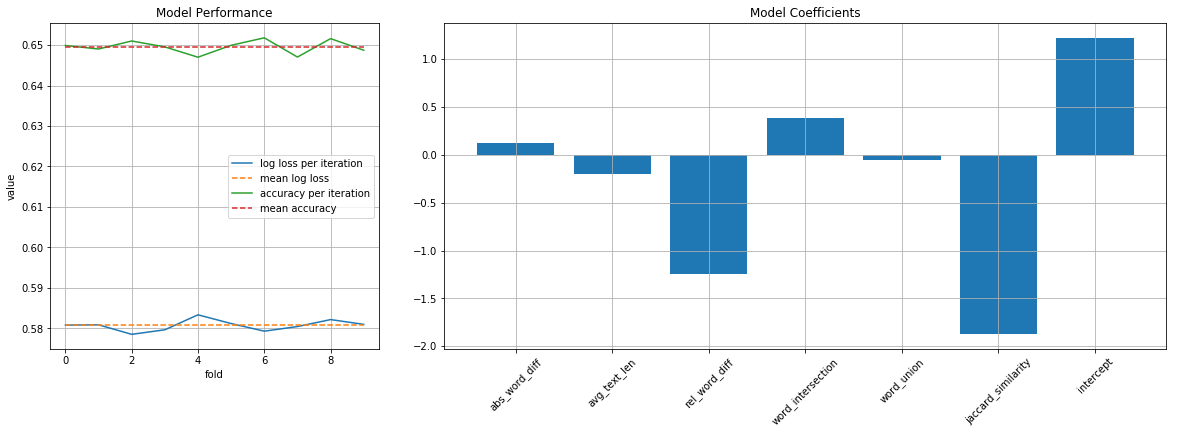

In [18]:
model = LogisticRegression()
lr_performance, lr_model = train_model(model, data, feats, 'is_duplicate')
print('Mean Loss', np.mean(lr_performance['log loss']), '+-', np.std(lr_performance['log loss']))

Mean Loss 0.6760810189597398 +- 0.15548277424657483


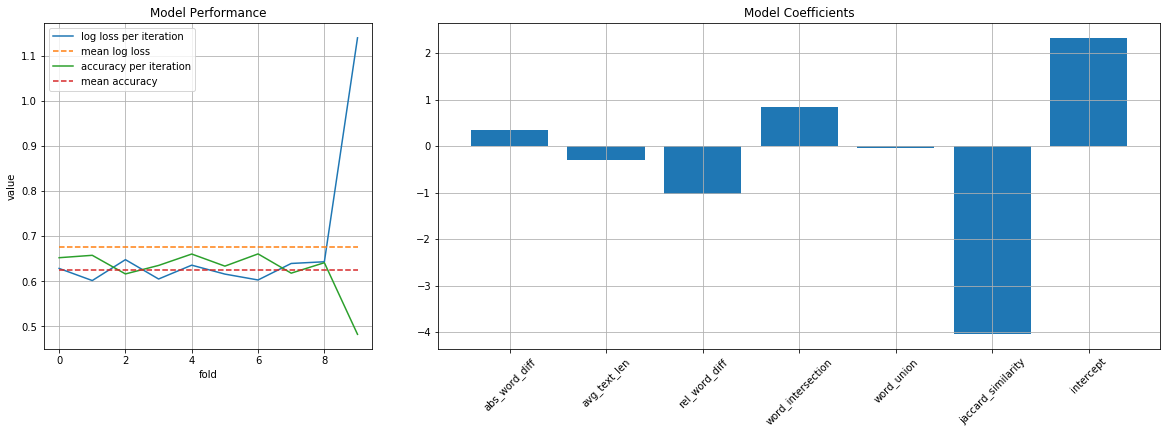

In [19]:
model = SGDClassifier(loss='log')
sgd_performance, sgd_model = train_model(model, data, feats, 'is_duplicate')
print('Mean Loss', np.mean(sgd_performance['log loss']), '+-', np.std(sgd_performance['log loss']))

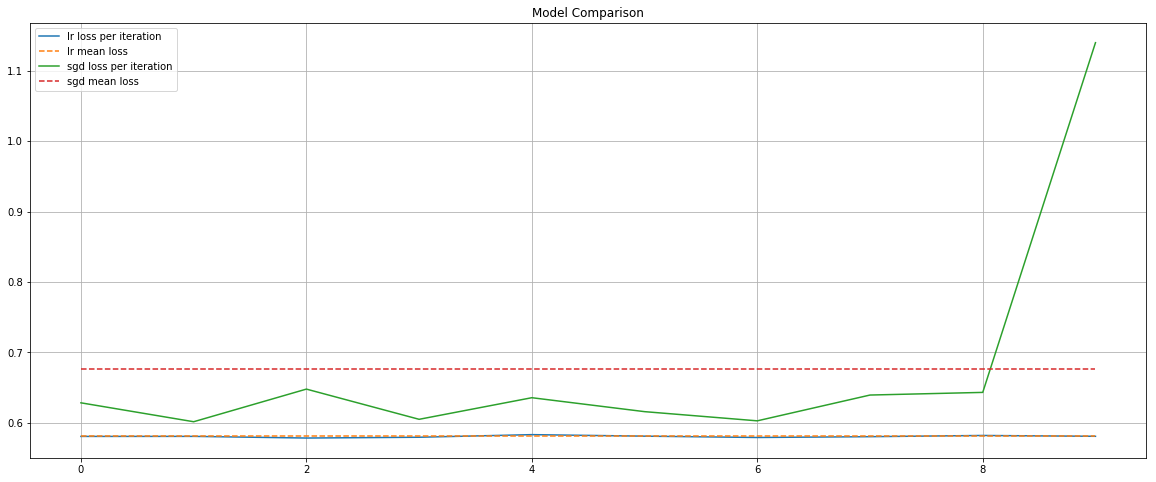

In [20]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_title('Model Comparison')
ax.plot(lr_performance['log loss'], label='lr loss per iteration')
ax.plot(np.ones(10)*np.mean(lr_performance['log loss']), '--', label='lr mean loss')
ax.plot(sgd_performance['log loss'], label='sgd loss per iteration')
ax.plot(np.ones(10)*np.mean(sgd_performance['log loss']), '--', label='sgd mean loss')
ax.grid()
ax.legend()